## Purpose

This notebook is to test whether the `neuro_op` module's nodes can successfully infer `world_dist` if only this distribution's information pieces $x_{world}$ are received (i.e., with rates h>0, r=0).

For this, the model is run with nodes receiving different amount of information (i.e., different `t_max`, `h`). Then, each node's posterior predictive distribution (*PPD*), equalling its forecast of future incoming information, is obtained via 
1. sampling of model parameters $\theta$ proportional to its posterior $p(\theta | x_{world})$;
2. using these sampled model parameters to generate data proportional to the model likelihood $p(x_{PPD}|\theta_{sampled})$

PPDs thereby fully conserves uncertainty by paying respect to both posterior and likelihood stochasticity.

We then use the PPDs to quantify the nodes' modelling accuracy by computing the Kullback-Leibler divergence and average MLE distances between node PPDs and data generated by `world_dist`.

In [1]:
import copy  # deep-copying of input dictionary (which includes mutable objects)
import gc  # explicit garbace collection calling after each run
import neuro_op as nop  # project's main module
import matplotlib.pyplot as plt  # because Figures >> Text

# import networkx as nx          # network initialization
import numpy as np  # ...of course we need numpy
import palettable as pt  # nicer color pallettes
import pickle  # output export/import
import scipy.stats as st  # ...of course we need scipy
import time  # runtime measuring

In [2]:
cmap = pt.scientific.sequential.Tokyo_4_r.get_mpl_colormap()

#### Figure 1

What:
Changes in computation times.

Varying parameters:
- $t_{max} = 1eX, X\in\{2,3,4,5,6,7^?\}$
- $N_{agents} = 1eX, X\in\{1,2,3,4,5\}$


In [3]:
data_dir = "../tests/data/2024-02--Run0/"
filenames = [
    "out{'N_nodes': 10, 't_max': 10}--2024-02-09--20-10----export.pkl",
    "out{'N_nodes': 10, 't_max': 100}--2024-02-09--20-10----export.pkl",
    "out{'N_nodes': 10, 't_max': 1000}--2024-02-09--20-10----export.pkl",
    "out{'N_nodes': 10, 't_max': 10000}--2024-02-09--20-10----export.pkl",
    "out{'N_nodes': 100, 't_max': 10}--2024-02-09--20-10----export.pkl",
    "out{'N_nodes': 100, 't_max': 100}--2024-02-09--20-10----export.pkl",
    "out{'N_nodes': 100, 't_max': 1000}--2024-02-09--20-10----export.pkl",
    "out{'N_nodes': 100, 't_max': 10000}--2024-02-09--20-10----export.pkl",
    "out{'N_nodes': 1000, 't_max': 10}--2024-02-09--20-10----export.pkl",
    "out{'N_nodes': 1000, 't_max': 100}--2024-02-09--20-10----export.pkl",
    "out{'N_nodes': 1000, 't_max': 1000}--2024-02-09--20-10----export.pkl",
    "out{'N_nodes': 1000, 't_max': 10000}--2024-02-09--20-10----export.pkl",
    "out{'N_nodes': 10000, 't_max': 10}--2024-02-09--20-12----export.pkl",
    "out{'N_nodes': 10000, 't_max': 100}--2024-02-09--20-12----export.pkl",
    "out{'N_nodes': 10000, 't_max': 1000}--2024-02-09--20-13----export.pkl",
    "out{'N_nodes': 10000, 't_max': 10000}--2024-02-09--20-22----export.pkl",
]

In [4]:
# Import pickle data from paramter scan runs:

# Extract 't_exec' for {N_nodes, t_max} adaptions for 3d plot
exec_times = []
for file in filenames:
    with open(data_dir + file, "rb") as export:
       output = pickle.load(export)
       exec_times.append(output["t_exec"])
exec_times = np.array(exec_times).reshape(4,4)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


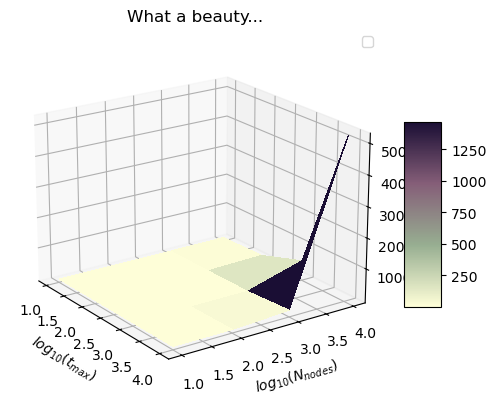

In [5]:
# Plot data
x = range(1,5)
y = range(1,5)
x, y = np.meshgrid(x,y)
z = np.log10(exec_times)
z2 = exec_times

# Create surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z2, cmap=cmap, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

# Legend, cosmetics...
ax.legend()
ax.set_xlabel("$log_{10}(t_{max})$")
ax.set_ylabel("$log_{10}(N_{nodes})$")
ax.set_zlabel('Z')
ax.view_init(elev=20., azim=-35, roll=0)    # Customize viewing angle

plt.title("What a beauty...")

plt.show()
